<a href="https://colab.research.google.com/github/RAMAVATHSRINU/capstone-project-playstore/blob/main/Play_Store_App_Review_Analysis_Capstone_Project_1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

Before exploring play store apps data, first import all the libraries,mounting the drive and reading the dataset.After this,exploring head,tail,shape,columns,information of the dataset.

In [2]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  
import warnings

In [4]:
# Reading the csv file
file_path= "/content/gdrive/MyDrive/Almabetter/Capstone Project1/Copy of Play Store Data.csv"
psd=pd.read_csv(file_path)

Data is taken from the Google play store dataset. Every row contains various entries regarding a certain app. We will be doing Exploratory data analysis on this data set, which is a very important step in data science cycle,

Problem Statement:

1).Find the apps rating of top five highest earning apps?

2).Top categories on Google Playstore?

3). Which category of Apps from the Content Rating column are found more on playstore ?


4).what is the Percent of Free App in store?

 5).what are the Top apps that are of paid type?

 6). What is the relation among the price,size,rating, reviews and installs of apps?

7).Paid App Content Rating?

8).Which are the categories of app having highest number of installs?

In [5]:
#head is nothing but it will show the first 5rows in given data
psd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
#tail is nothing but it will show the last 5rows in given data
psd.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
#using the shape to know the shape of the dataset
psd.shape

(10841, 13)

In [8]:
#info of the dataset
psd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
# Convert "price" column from string to float
psd['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

Changing the dtype of price column from string to float

In [10]:
#to convert string to float we must remove the dollar symbol from the all values,Then we can assign float datatype to those values.
def price(price):
  ''' Changing the data type of Price column from object to float '''
  if '$' in str(price):
    price=price.replace('$','')
    price=float(price)
  if 'Everyone' in str(price):
    price=price.replace('Everyone','0')
    price=float(price)
    
  return price

psd['Price']=psd['Price'].apply(lambda x: price(x))
psd['Price']=psd['Price'].astype(float)

In [11]:
psd['Price'].value_counts()

0.00     10041
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
19.90        1
1.75         1
14.00        1
4.85         1
1.04         1
Name: Price, Length: 92, dtype: int64

In [12]:
psd[psd['Price']!=0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


In [13]:
#creating the function for reviews column from object to float
def reviews(reviews):
  ''' Changing the data type of Reviews column from object to float '''
  if 'M' in str(reviews):
    reviews =reviews.replace('M','')
    reviews=float(reviews)*1000000
  else:
    reviews=reviews
    return reviews

psd['Reviews']=psd['Reviews'].apply(lambda x: reviews(x))
psd['Reviews']=psd['Reviews'].astype(float)
psd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
psd[psd['Reviews']!=0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
psd['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [16]:
# Changing the data type of Install column from object to float
def install(install):
  ''' Changing the data type of Install column from object to float '''
  if ',' in str(install):
    install=install.replace(',','')
  if '+' in str(install):
    install=install.replace('+','')
  if 'Free' in str(install):
    install=install.replace('Free','0')
    install=float(install)
    
  return install

psd['Installs']=psd['Installs'].apply(lambda x: install(x))
psd['Installs']=psd['Installs'].astype(float)
psd.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
psd[psd['Installs']!=0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
psd['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [19]:
#creating a fucntion to convert kb tp mb
def convert_kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val
psd['Size'] = psd['Size'].apply(lambda x: convert_kb_to_mb(x))
psd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
psd['Size'].value_counts()

Varies with device    1695
11.0                   198
12.0                   196
14.0                   194
13.0                   191
                      ... 
0.4189                   1
0.1953                   1
0.4492                   1
0.7109                   1
0.6045                   1
Name: Size, Length: 461, dtype: int64

In [21]:
#count of dataset
psd.count()

App               10841
Category          10841
Rating             9367
Reviews           10840
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [22]:
psd.describe()

,Rating,Reviews,Installs,Price
count,9367.000000,1.084000e+04,1.084100e+04,10841.000000
mean,4.193338,4.441529e+05,1.546291e+07,1.027273
std,0.537431,2.927761e+06,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,19.000000,7.815831e+07,1.000000e+09,400.000000


In [23]:
#checking how many apps present in the data
psd['App'].count()

10841

In [24]:
psd['Size'].head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: object

In [25]:
#checking how many unique value present in the 'size'
psd['Size'].unique()

array([19.0, 14.0, 8.7, 25.0, 2.8, 5.6, 29.0, 33.0, 3.1, 28.0, 12.0, 20.0,
       21.0, 37.0, 2.7, 5.5, 17.0, 39.0, 31.0, 4.2, 7.0, 23.0, 6.0, 6.1,
       4.6, 9.2, 5.2, 11.0, 24.0, 'Varies with device', 9.4, 15.0, 10.0,
       1.2, 26.0, 8.0, 7.9, 56.0, 57.0, 35.0, 54.0, 0.1963, 3.6, 5.7, 8.6,
       2.4, 27.0, 2.5, 16.0, 3.4, 8.9, 3.9, 2.9, 38.0, 32.0, 5.4, 18.0,
       1.1, 2.2, 4.5, 9.8, 52.0, 9.0, 6.7, 30.0, 2.6, 7.1, 3.7, 22.0, 7.4,
       6.4, 3.2, 8.2, 9.9, 4.9, 9.5, 5.0, 5.9, 13.0, 73.0, 6.8, 3.5, 4.0,
       2.3, 7.2, 2.1, 42.0, 7.3, 9.1, 55.0, 0.0225, 6.5, 1.5, 7.5, 51.0,
       41.0, 48.0, 8.5, 46.0, 8.3, 4.3, 4.7, 3.3, 40.0, 7.8, 8.8, 6.6,
       5.1, 61.0, 66.0, 0.0771, 8.4, 0.1152, 44.0, 0.6787, 1.6, 6.2,
       0.0176, 53.0, 1.4, 3.0, 5.8, 3.8, 9.6, 45.0, 63.0, 49.0, 77.0, 4.4,
       4.8, 70.0, 6.9, 9.3, 8.1, 36.0, 84.0, 97.0, 2.0, 1.9, 1.8, 5.3,
       47.0, 0.543, 0.5137, 76.0, 7.6, 59.0, 9.7, 78.0, 72.0, 43.0, 7.7,
       6.3, 0.3262, 34.0, 93.0, 65.0, 79.0, 100.0, 

In [26]:
psd['Installs'].head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

In [27]:
#checking Installs unique
psd['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [28]:
#checking Genres uniques
psd['Genres'].unique()


array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [29]:
psd['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [30]:
psd['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [31]:
psd['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [32]:
psd['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [33]:
psd['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

#Describing the cloumns

psd(play store data) dataframe has 10841 rows and 13 columns.

1.App -  application Name .

2.Category - It gives the category to the app.

3.Rating - It contains the average rating the respective app given by the users.

4.Reviews - reviews is nothing but number of user reviews of the app.

5.Size - Size of the app.

6.Installs - the total number of installs/downloads for an application.

7.Type - IIt states whether an app is free to use or paid.

8.Price - Price of the appzero if it is free

9.Content Rating -whether the app is suitable for all age groups or not.

10.Genres - Geners of the app

11.Last Updated -  when the app application was updated.

12.Current Ver - the current version of the application.

13.Android Ver - the android version which can support the application on its platform

#Cleaning the data

**Dealing with the null values**

In [34]:
#creating checking how many not null values present in the data
def psdinfo():
   data=pd.DataFrame(index=psd.columns)
   data["is null"]=psd.isnull().sum()
   return(data)
psdinfo()

,is null
App,0
Category,0
Rating,1474
Reviews,1
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


1,Rating has 1474 null values.

2,type has 1 null value.

3,Content Rating has 1 null value.

4,Current var has 8 null values.

5,Android Var has 3 null Values.


In [35]:
#checking the not null values
def psdinfo():
   data=pd.DataFrame(index=psd.columns)
   data["not null values"]=psd.count()
   return(data)
psdinfo()

,not null values
App,10841
Category,10841
Rating,9367
Reviews,10840
Size,10841
Installs,10841
Type,10840
Price,10841
Content Rating,10840
Genres,10841


In [36]:
#checking the unique values
def psdinfo():
   data=pd.DataFrame(index=psd.columns)
   data["unique count"]=psd.nunique()
   return(data)
psdinfo()

,unique count
App,9660
Category,34
Rating,40
Reviews,6001
Size,461
Installs,20
Type,3
Price,92
Content Rating,6
Genres,120


In [37]:
#As we mentioned above Rating has 1474 null values so filling them with the mean of the rating values
psd['Rating'].fillna(np.mean(psd['Rating']),inplace=True)
psd['Rating'].isnull().sum()

0

In [38]:
#there is only one null value presnet in the type so deleting it
psd.drop(index=psd[psd['Type'].isna()].index,axis=0,inplace=True)
psd['Type'].isnull().sum()

0

In [39]:
# Current Ver column has 0ne null value so deleting it
psd.drop(index=psd[psd['Content Rating'].isna()].index,axis=0,inplace=True)
psd['Content Rating'].isnull().sum()

0

In [40]:
# Current Ver column has 8 null values so deleting it
psd.drop(index=psd[psd['Current Ver'].isna()].index,axis=0,inplace=True)
psd['Current Ver'].isnull().sum()

0

In [41]:
#Android Ver column has 3 null values so deleting it
psd.drop(index=psd[psd['Android Ver'].isna()].index,axis=0,inplace=True)
psd['Android Ver'].isnull().sum()

0

In [42]:
#checking is there any null values present in the dataset
psd.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [43]:
#Finding mean and median in the Rating column excluding the NaN values
psd[(psd['Rating'] <1) | (psd['Rating']>5)]
mean = round(psd[~psd['Rating'].isnull()]['Rating'].mean(),4)

median= psd[~psd['Rating'].isnull()]['Rating'].median()

[mean,median]


[4.192, 4.2]

mean of the Rating column is = 4.192,
median of the Rating column is =4.2

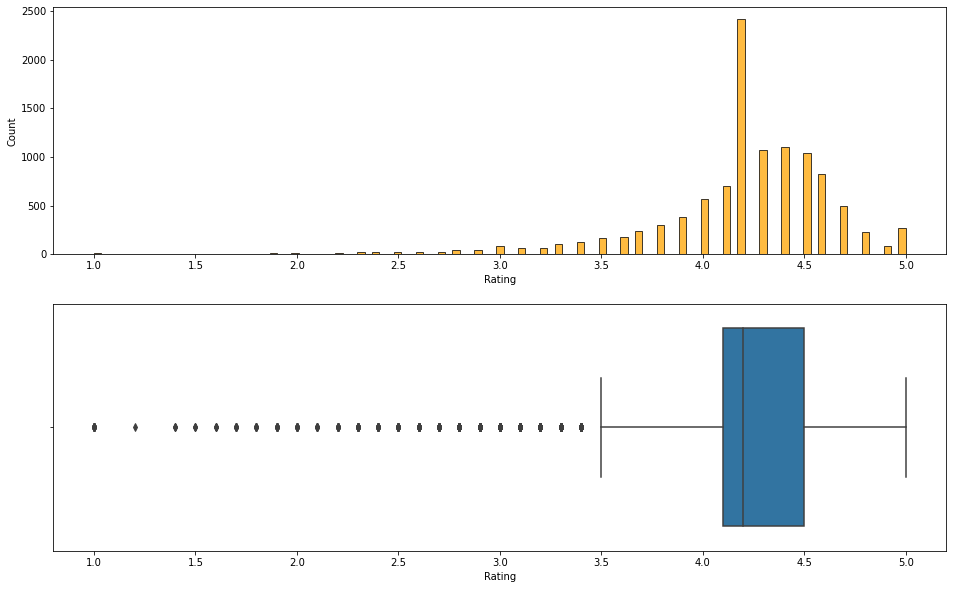

In [44]:
#creating a graph for mean and median
fig, ax = plt.subplots(2,1, figsize=(16,10))
sns.histplot(psd['Rating'],color='orange',ax=ax[0])
sns.boxplot(x='Rating',data=psd, ax=ax[1])


In [45]:
print( len(psd['Category'].unique()) , "categories")

print("\n", psd['Category'].unique())

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, 'Count of app in each category')

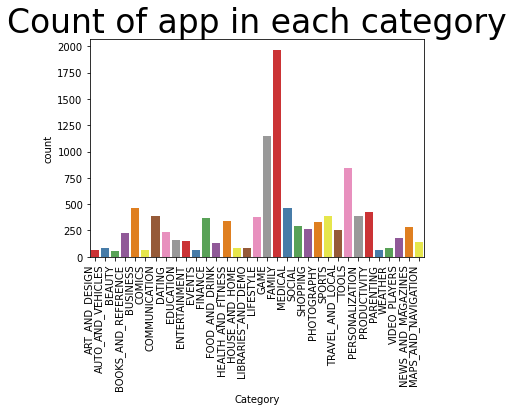

In [46]:
g = sns.countplot(x="Category",data=psd, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size =33)

In [47]:
psd[psd.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805.0,Varies with device,5000000.0,Free,0.0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872.0,Varies with device,10000000.0,Free,0.0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991.0,Varies with device,5000000.0,Free,0.0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614.0,37.0,10000000.0,Free,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989.0,Varies with device,1000000.0,Free,0.0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610.0,Varies with device,10000000.0,Free,0.0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370.0,Varies with device,1000000.0,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017.0,Varies with device,100000000.0,Free,0.0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123.0,86.0,10000.0,Free,0.0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


**Problem Statement:**

**1).Find the apps rating of top five highest earning apps?**

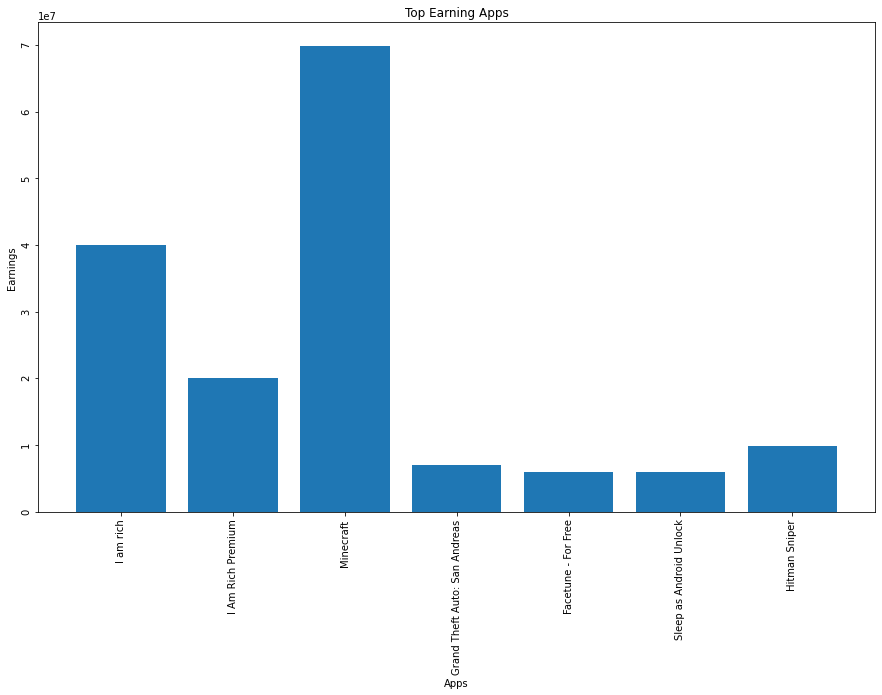

In [48]:
#finding the apps ratios of top five highest earning  apps
paid_one = psd[psd['Type'] == 'Paid']
earn =paid_one.loc[:,('App', 'Installs', 'Price')]
earn['Earnings'] = earn['Installs'] * earn['Price'];
sorted_earn = earn.sort_values(by='Earnings', ascending=False).head(10)
sorted_price= sorted_earn.sort_values(by='Price', ascending=False)
#ploting the graph
plt.figure(figsize=(15,9))
plt.bar(sorted_price.App,sorted_price.Earnings,  label=sorted_price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");


In the above graph the top five highest earning apps are:

1,Minecraft

2,Im rich

3.Iam Rich premium

**2).Top categories on Google Playstore?**

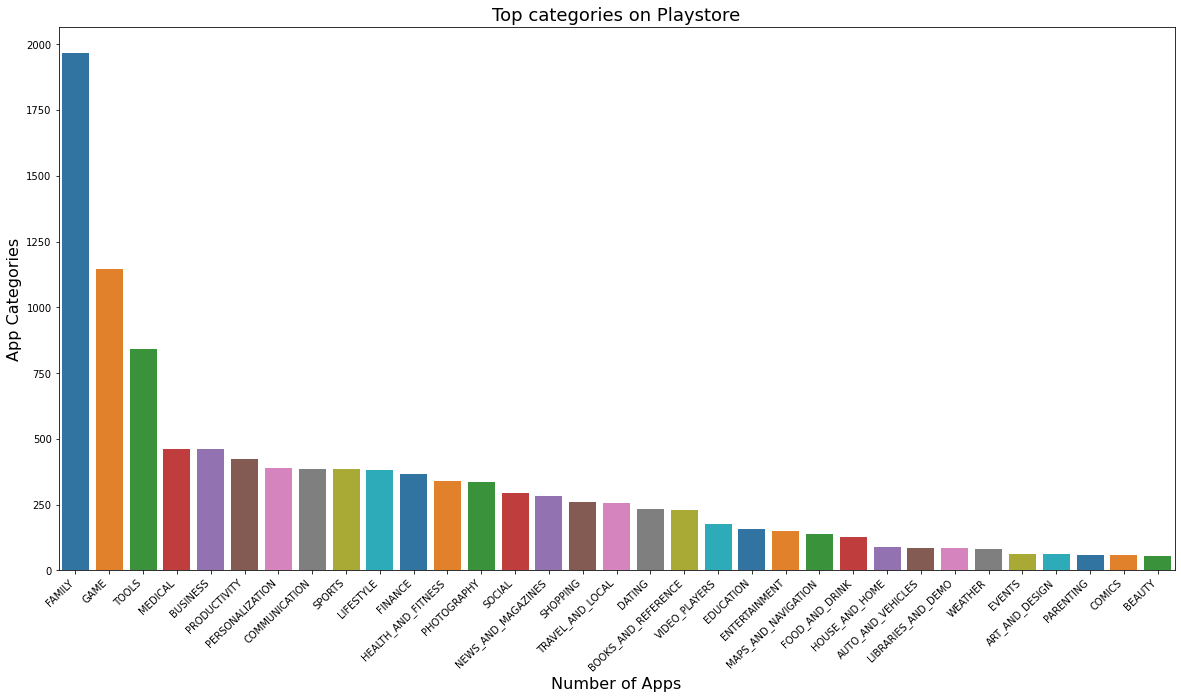

In [49]:
#top category on google playstore
x = psd['Category'].value_counts()
y = psd['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=16)
plt.ylabel('App Categories', size=16)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 18)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 44, horizontalalignment='right',);


We can see in the above graph the Top category in the google play store apps are :

1.Family

2.Games

3.Tool


3).  Which category of Apps from the Content Rating column are found more on playstore ?

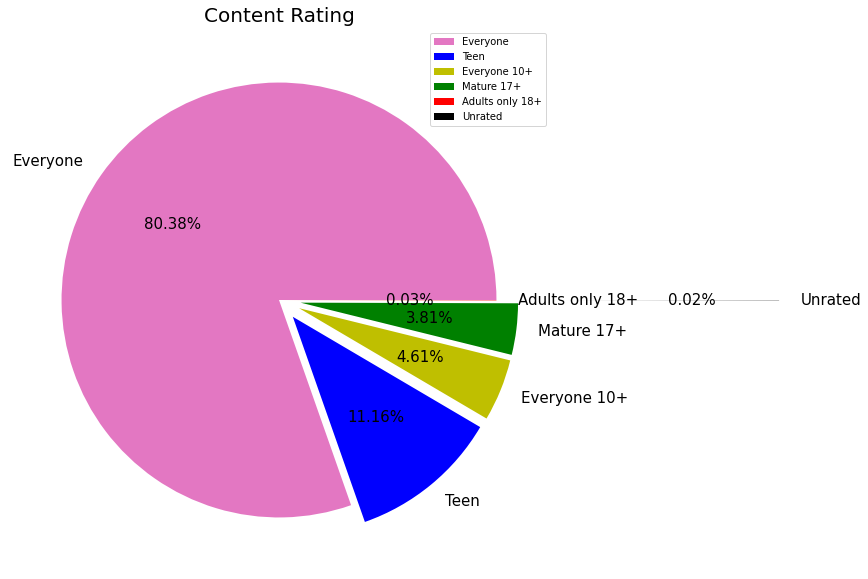

In [50]:
#content rating
data = psd['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C6', 'b', 'y', 'g', 'r', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()



In the above pychart we can see content rating of the apps

1,80.38% for everyone.

2,11.16% fro Teen .

3,4.61% for everyone that is above 10+

4,3.81% for Mature that is above 17+

5, 0.03% adults only that is above 18+


4).what is the Percent of Free App in store?

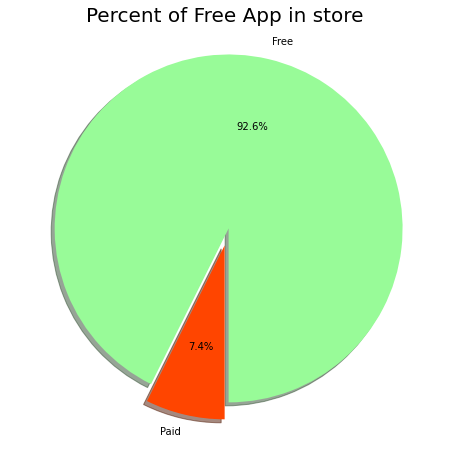

In [51]:
#free app percentage in store
from matplotlib.projections.polar import rcParams

labels =psd['Type'].value_counts(sort = True).index
sizes = psd['Type'].value_counts(sort = True)


colors = ["palegreen","orangered"]
explode = (0.1,0) 
rcParams['figure.figsize'] = 8,8
#ploting graph
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 20)
plt.show()

In the above pychart 92.6% are the free apps and the remaining 7.4% are the paid apps.


5).what are the Top apps that are of paid type?

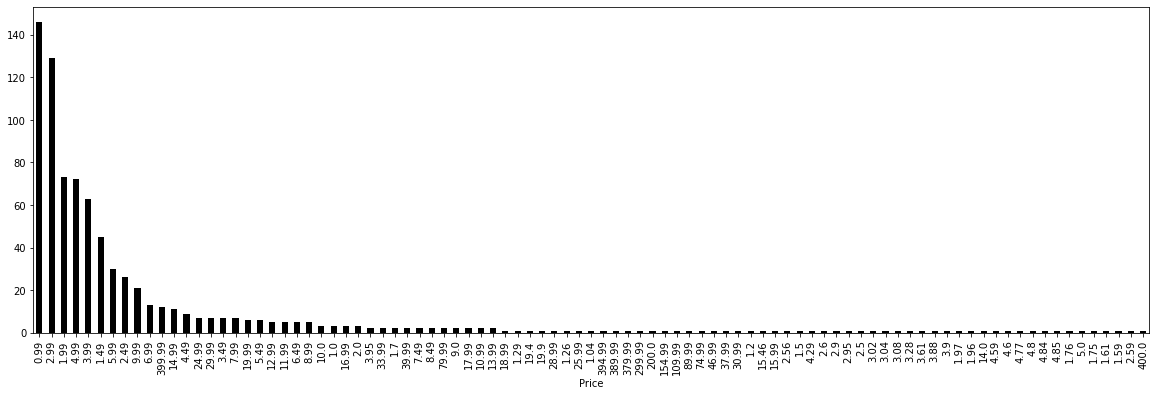

In [52]:
# Creating a df containing only paid apps and  Number of apps that can be installed at a particular price
paid_df=psd[psd['Type']=='Paid']
paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'black')

6). What is the relation among the price,size,rating, reviews and installs of apps?

In [53]:
#corelation
corr_df=psd[['Installs','Price','Size','Rating','Reviews']]
corr_df=corr_df.corr()
corr_df


,Installs,Price,Rating,Reviews
Installs,1.000000,-0.011698,0.051126,0.643112
Price,-0.011698,1.000000,-0.020193,-0.009674
Rating,0.051126,-0.020193,1.000000,0.067945
Reviews,0.643112,-0.009674,0.067945,1.000000


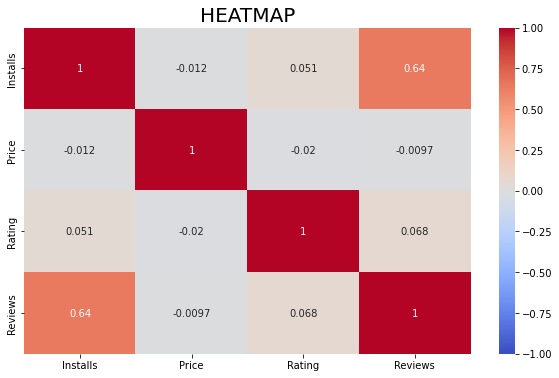

In [54]:
#ploting heatmap
plt.figure(figsize=(10,6))
plt.title('HEATMAP',size=20)
sns.heatmap(corr_df,vmin=-1,cmap='coolwarm',annot=True)

In the above graph you can see Correlation is highest between number of Installs and Reviews(0.64)

7).Paid App Content Rating?

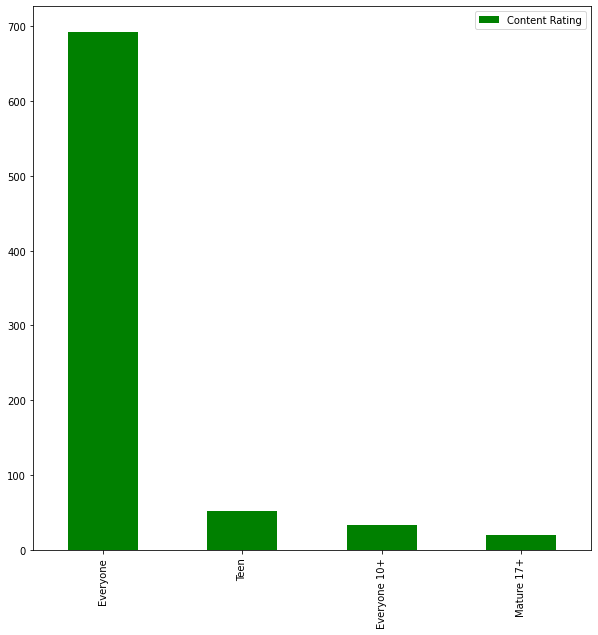

In [55]:
#ploting the Paid App  Content Ratinig
paid_df['Content Rating'].value_counts().plot.bar(figsize=(10,10),color='g')
plt.legend()


 In the above graph  "Everyone" has highest content rating compare to others


8).Which are the categories of app having highest number of installs?

In [56]:
#count the Number of installation in each catagory
most_install= psd.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
most_install.head()

,Installs
Category,
GAME,3.508602e+10
COMMUNICATION,3.264728e+10
PRODUCTIVITY,1.417609e+10
SOCIAL,1.406987e+10
TOOLS,1.145227e+10


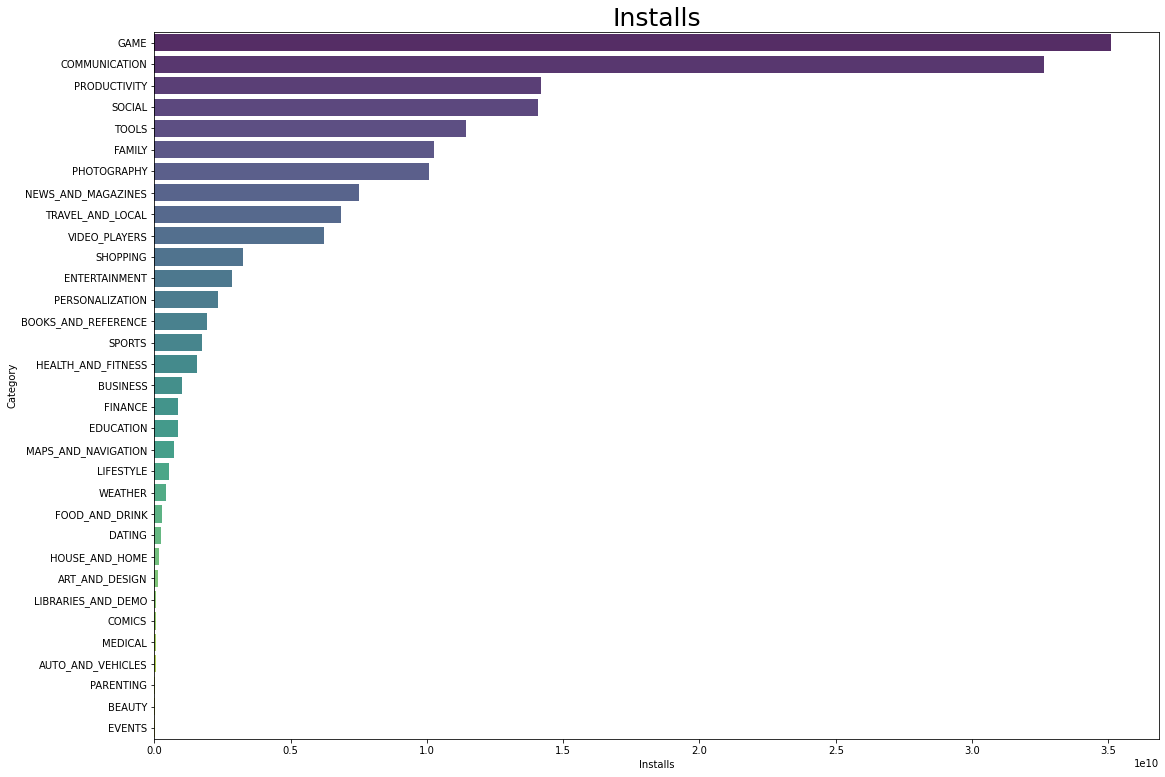

In [57]:
#ploting the graph
x2sis = []
y2sis = []

for i in range(len(most_install)):
    x2sis.append(most_install.Installs[i])
    y2sis.append(most_install.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

  In the above graph we can see categories of app having highest number of installs are:

 Games and Communication, productavity, social, tools,photography,family,new and magazines,video players,Travel and Local

**Summary:**

In this project of analyzing play store app,
In the starting phase, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis,In this project of analyzing play store applications, we have worked on several parameters which would company to do well in launching their apps on the play store. The explanation about capstone project EDA and the project is Google play store app.in the starting the data analysis I m using import statement then, google.colab import drive, mount the drive and read csv file, check the data type ,then I m giving variable name psd(play store data).first i have check the columns present in the given data and also i have check the data frame head which means the first 5 columns in the data and tails is last 5 columns of data and many more dataframe i have used to do this project like (info,describe,unique,rating,shape,isnull,notna,max,min,mean,median etc..)and the next i have cleaned the data and then moved to the data visualize the data part and finally got good result.



**Conclusion:**

found the following insights:-

1)found the ratio of the top five highest earning apps i.e, iam rich,priemium, minecraft is the highest erning app.

2)top category  in the google play store apps are Family,Games,Tool,and Eductaion

3)content rating column are 
   80.38% everyone 
   11.16% Teen
   4.61% everyone 10+
   mature 17+
   0.03% only adults 18+

4.Percentage of free apps 92.6% are the free apps and the remaining 7.4% are the paid apps.

5) Most number of apps are having Rating between 4.1 and 4.6.

6) 92.6% free apps
   7.4% paid apps

7) Correlation is highest between number of Installs and Reviews(0.64).

8),the categories of app having highest number of installs are:

 Games and Communication, productavity, social, tools,photography,family,new and magazines,video players,Travel and Local